# Pharmaceutical Manufacturing Outsourcing Optimization
## Background
This project seeks to approach a common pharmaceutical industry challenge of scaling a drug to production after FDA approval. 
There is urgency in the process of scaling to production because after filing, the patent for the drug is only held by the company for 10 years 
and vertically integrating is no longer the most economically viable option. 3rd party vendors must be employed to sequentially 
build the molecule over many steps that results in the active pharmaceutical ingredient (API). Selection of these vendors can be 
a strenous and inefficient process to work out as dozens of steps is common to build an API, however if each vendor is modeled by a
set of parameters, computational optimization is the perfect tool to rapidly determine the third party vendor sequence for API 
construction that allows for the pharma company to realize the maximum profit the patent is able to produce within the 10 year period.



# Problem Description

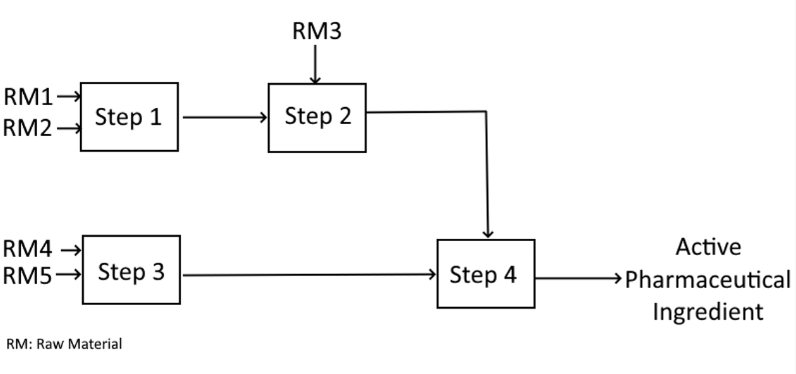

Consider the above flowsheet, in which raw materials are input to a sequence of steps, each step representing a unit operation type such as a reaction or separation. The final product of all of these steps is an Active Pharmaceutical Ingredient (API). For a given step it is possible to go from reagents to products represented by different sequences that encompass types of operations such as batch, hybrid, or continuous reactors.

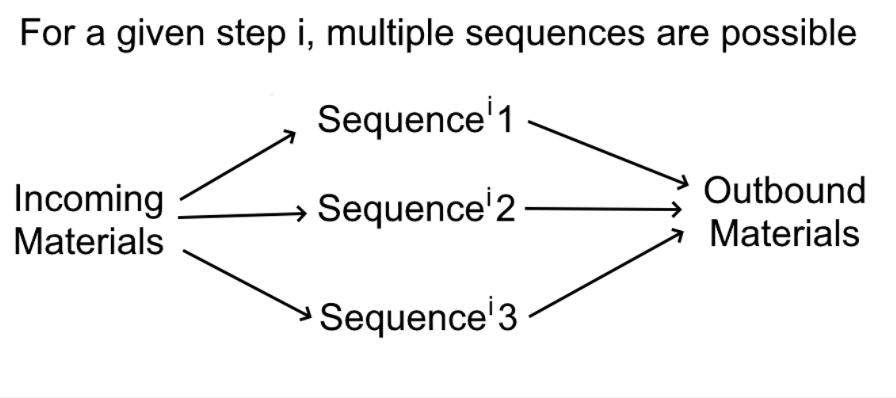

A pharmaceutical company that has just patented an API and wishes to produce it via this synthesis pathway must outsource the steps to third party vendors to retain a competitive advantage. Third party vendors are individually capable of some steps via some synthesis pathways as displayed below. 

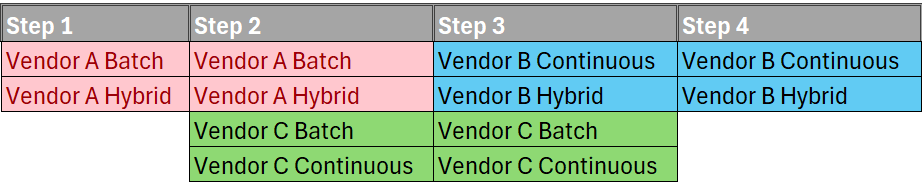

The challenge is determining the best vendors to assign to each step. Computational optimization provides a modern tool to efficiently determine the best vendor for each step by minmizing the cost necessary to produce the products from the reactants. For this problem considering all possibilities in a superstructure results in the following flow sheet.

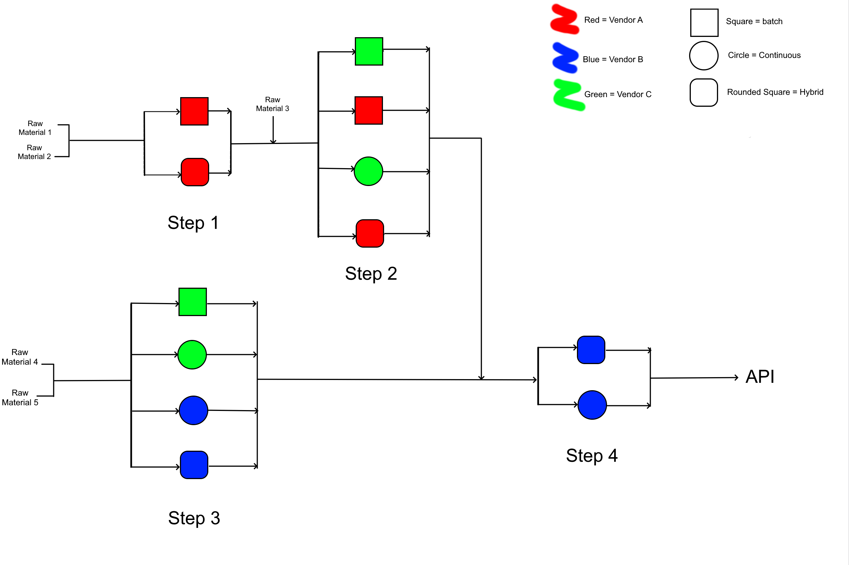

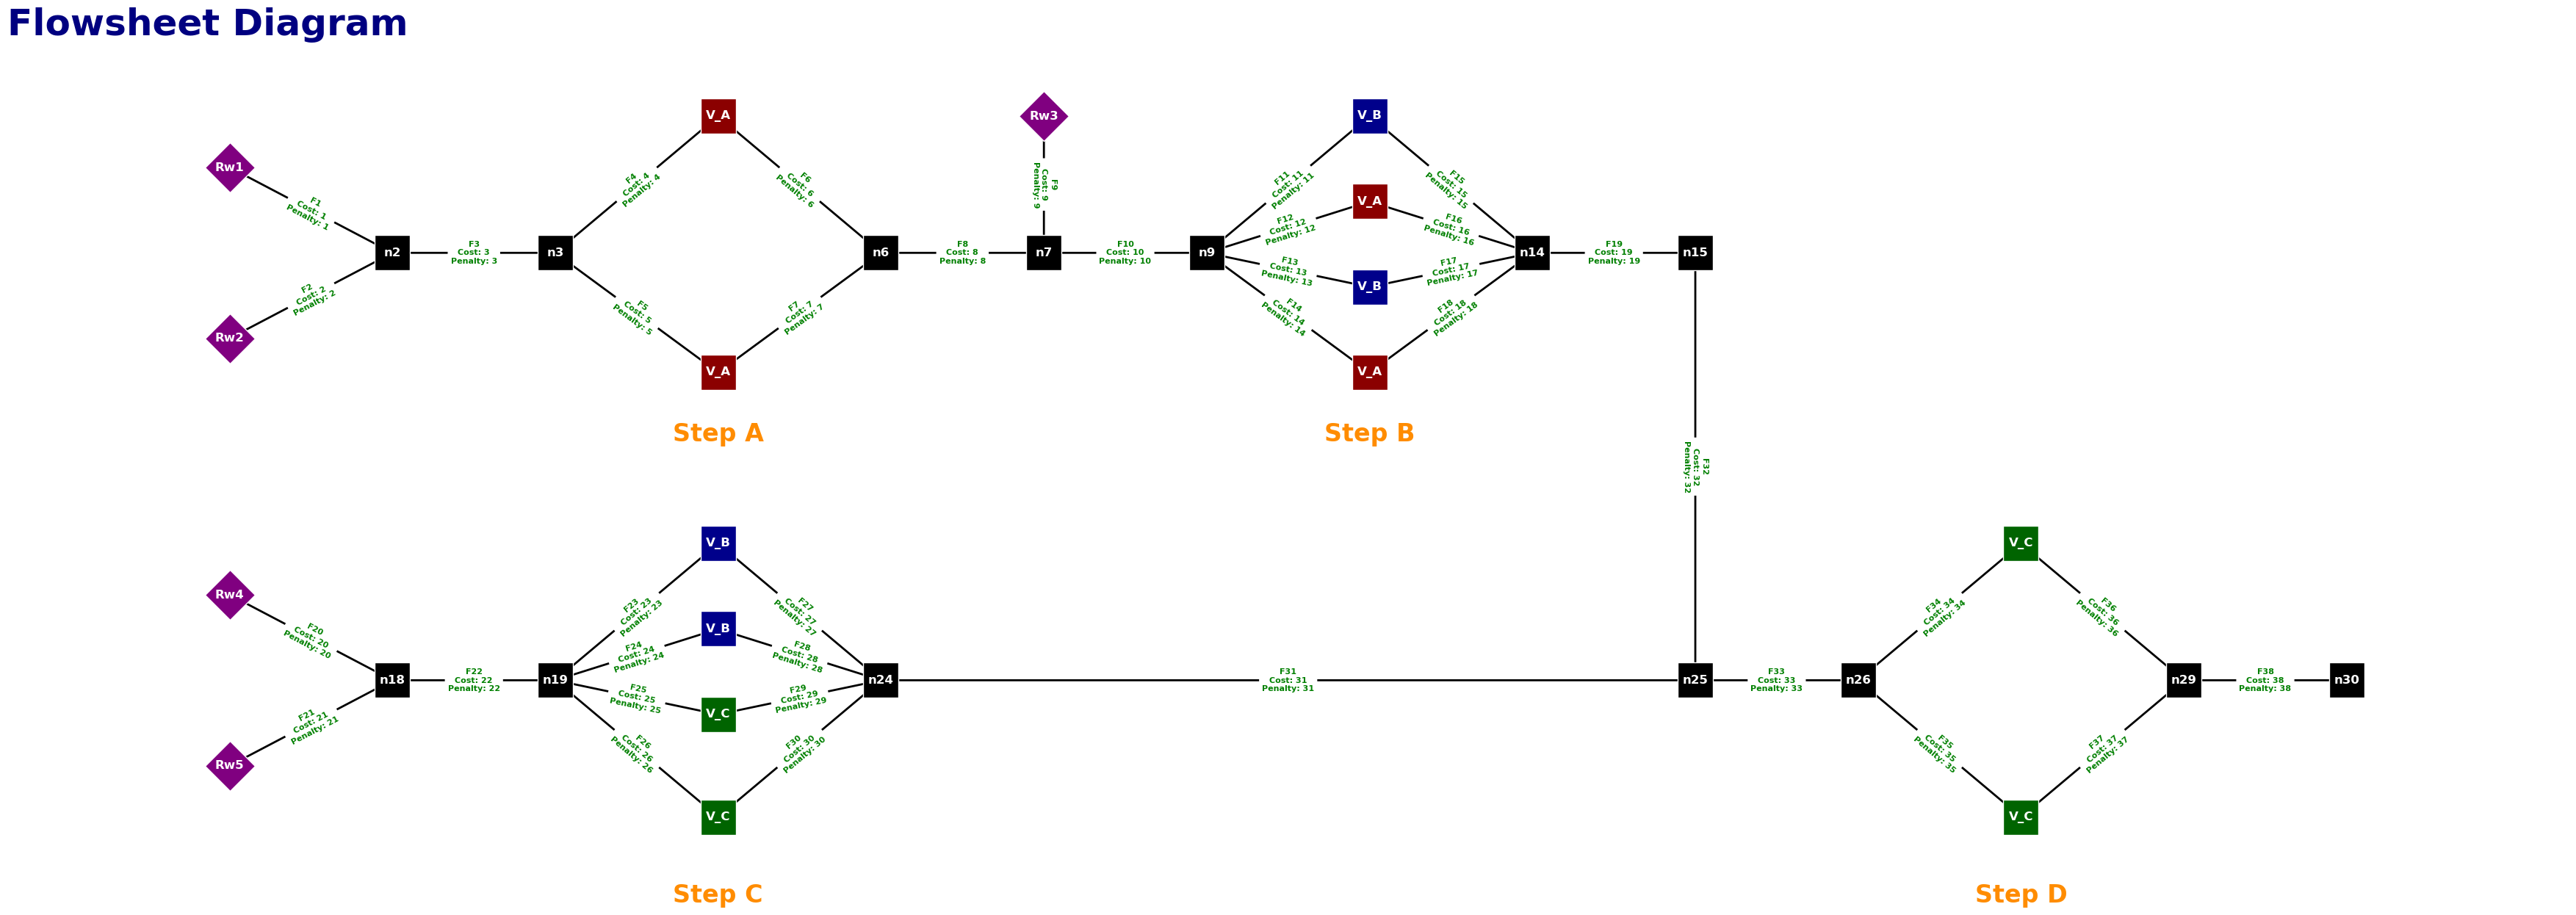

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to initialize and configure the directed graph
def create_graph():
    return nx.DiGraph()

# Define node positions
def get_node_positions():
    return {
        "n0": (-3, 3), "n1": (-3, 2), "n2": (-2, 2.5), "n3": (-1, 2.5),
        "n4": (0, 3.3), "n5": (0, 1.8), "n6": (1, 2.5), "n7": (2, 2.5),
        "n8": (2, 3.3), "n9": (3, 2.5), "n10": (4, 3.3), "n11": (4, 2.8),
        "n12": (4, 2.3), "n13": (4, 1.8), "n14": (5, 2.5), "n15": (6, 2.5),
        "n16": (-3, 0.5), "n17": (-3, -0.5), "n18": (-2, 0), "n19": (-1, 0),
        "n20": (0, 0.8), "n21": (0, 0.3), "n22": (0, -0.2), "n23": (0, -0.8),
        "n24": (1, 0), "n25": (6, 0), "n26": (7, 0), "n27": (8, 0.8),
        "n28": (8, -0.8), "n29": (9, 0), "n30": (10, 0)
    }

# Define edges with cost and penalty values
def get_edges_with_weights():
    return {
        ("n0", "n2"): {"cost": 1, "penalty": 1},
        ("n1", "n2"): {"cost": 2, "penalty": 2},
        ("n2", "n3"): {"cost": 3, "penalty": 3},
        ("n3", "n4"): {"cost": 4, "penalty": 4},
        ("n3", "n5"): {"cost": 5, "penalty": 5},
        ("n4", "n6"): {"cost": 6, "penalty": 6},
        ("n5", "n6"): {"cost": 7, "penalty": 7},
        ("n6", "n7"): {"cost": 8, "penalty": 8},
        ("n8", "n7"): {"cost": 9, "penalty": 9},
        ("n7", "n9"): {"cost": 10, "penalty": 10},
        ("n9", "n10"): {"cost": 11, "penalty": 11},
        ("n9", "n11"): {"cost": 12, "penalty": 12},
        ("n9", "n12"): {"cost": 13, "penalty": 13},
        ("n9", "n13"): {"cost": 14, "penalty": 14},
        ("n10", "n14"): {"cost": 15, "penalty": 15},
        ("n11", "n14"): {"cost": 16, "penalty": 16},
        ("n12", "n14"): {"cost": 17, "penalty": 17},
        ("n13", "n14"): {"cost": 18, "penalty": 18},
        ("n14", "n15"): {"cost": 19, "penalty": 19},
        ("n16", "n18"): {"cost": 20, "penalty": 20},
        ("n17", "n18"): {"cost": 21, "penalty": 21},
        ("n18", "n19"): {"cost": 22, "penalty": 22},
        ("n19", "n20"): {"cost": 23, "penalty": 23},
        ("n19", "n21"): {"cost": 24, "penalty": 24},
        ("n19", "n22"): {"cost": 25, "penalty": 25},
        ("n19", "n23"): {"cost": 26, "penalty": 26},
        ("n20", "n24"): {"cost": 27, "penalty": 27},
        ("n21", "n24"): {"cost": 28, "penalty": 28},
        ("n22", "n24"): {"cost": 29, "penalty": 29},
        ("n23", "n24"): {"cost": 30, "penalty": 30},
        ("n24", "n25"): {"cost": 31, "penalty": 31},
        ("n15", "n25"): {"cost": 32, "penalty": 32},
        ("n25", "n26"): {"cost": 33, "penalty": 33},
        ("n26", "n27"): {"cost": 34, "penalty": 34},
        ("n26", "n28"): {"cost": 35, "penalty": 35},
        ("n27", "n29"): {"cost": 36, "penalty": 36},
        ("n28", "n29"): {"cost": 37, "penalty": 37},
        ("n29", "n30"): {"cost": 38, "penalty": 38}
    }

def get_step_titles():
    return {
        "Step A": (0, 1.4), "Step B": (4, 1.4), "Step C": (0, -1.3), "Step D": (8, -1.3)
    }

def plot_graph(G, positions, edges_with_weights):
    plt.figure(figsize=(45, 15))

    # Define node categories
    V_A = ["n4", "n5", "n11", "n13"]  
    V_B = ["n10", "n12", "n20", "n21"]  
    V_C = ["n22", "n23", "n27", "n28"]  
    Rw_nodes = ["n0", "n1", "n8", "n16", "n17"]  

    # Define color and shape mappings
    color_map = {"V_A": "darkred", "V_B": "darkblue", "V_C": "darkgreen", "Rw": "purple", "default": "black"}
    shape_map = {"V_A": "s", "V_B": "s", "V_C": "s", "Rw": "D"}

    # Draw nodes with different styles
    for category, nodes in [("V_A", V_A), ("V_B", V_B), ("V_C", V_C), ("Rw", Rw_nodes)]:
        nx.draw_networkx_nodes(
            G, pos=positions, nodelist=nodes,
            node_color=color_map[category], node_size=1200, node_shape=shape_map[category], edgecolors="white"
        )

    # Draw other nodes
    other_nodes = [node for node in G.nodes if node not in V_A + V_B + V_C + Rw_nodes]
    nx.draw_networkx_nodes(
        G, pos=positions, nodelist=other_nodes,
        node_color=color_map["default"], node_size=1200, node_shape="s", edgecolors="white"
    )

    # Modify labels for display
    modified_labels = {node: "Rw1" if node == "n0" else ("Rw2" if node == "n1" else ("Rw3" if node == "n8" else "Rw4" if node == "n16" else ("Rw5" if node == "n17" else node))) for node in G.nodes}
    modified_labels.update({node: "V_A" for node in V_A})
    modified_labels.update({node: "V_B" for node in V_B})
    modified_labels.update({node: "V_C" for node in V_C})

    # Draw labels
    nx.draw_networkx_labels(G, pos=positions, labels=modified_labels, font_size=12, font_color="white", font_weight="bold")

    # Draw edges
    nx.draw_networkx_edges(G, pos=positions, arrowstyle="-", arrowsize=15, edge_color="black", width=2)

    # Define edge labels with cost and penalty values
    edge_labels = {edge: f"F{i+1}\nCost: {data['cost']}\nPenalty: {data['penalty']}" 
                   for i, (edge, data) in enumerate(edges_with_weights.items())}
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=8, font_color="green", font_weight="bold")

    # Add step titles
    step_titles = get_step_titles()
    for step, pos in step_titles.items():
        plt.text(pos[0], pos[1], step, fontsize=24, fontweight="bold", color="darkorange", ha="center")

    # Remove axes
    plt.axis("off")
    plt.title("Flowsheet Diagram", fontsize=36, fontweight="bold", color="Navy", loc="left")
    plt.show()


# Main function to execute the graph creation and plotting
def main():
    G = create_graph()
    positions = get_node_positions()
    edges_with_weights = get_edges_with_weights()

    # Add edges to the graph
    for edge, data in edges_with_weights.items():
        G.add_edge(edge[0], edge[1], **data)
        
    step_titles = get_step_titles()
    plot_graph(G, positions, edges_with_weights)

if __name__ == "__main__":
    main()
